## EDA

In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#define filename
filename='NYC Charter Schools 3-8 Test Scores 2017/Data-Table 1.csv'
#import csv
data=pd.read_csv(filename,skiprows=3)
#I had to skip the first 3 rows of the file due to some fancy formatting that messed up which data got grouped into
#which column

In [3]:
data.shape

(885, 25)

In [4]:
data.head()

,Unnamed: 0,Borough,CSD,BedsCode,DBN,School Name,Grade,Charter,District,Diff,...,Diff.2,Charter.3,District.3,Diff.3,Charter.4,District.4,Diff.4,Charter.5,District.5,Diff.5
0,NaN,Bronx,7,320700860957,84X491,Academic Leadership Charter School,3,85.7%,27.5%,58.2,...,52,85.7%,28.4%,57.3,64.3%,11.6%,52.7,344,290.0,54
1,NaN,Bronx,7,320700860957,84X491,Academic Leadership Charter School,4,72.6%,25.5%,47.1,...,37,68.6%,22.3%,46.3,47.1%,7.4%,39.6,332,284.0,48
2,NaN,Bronx,7,320700860957,84X491,Academic Leadership Charter School,5,50.9%,19.4%,31.5,...,46,60.8%,21.1%,39.7,31.4%,4.1%,27.3,322,290.0,32
3,NaN,Bronx,7,320700860957,84X491,Academic Leadership Charter School,6,25.0%,12.6%,12.4,...,22,35.3%,12.6%,22.7,15.7%,4.4%,11.3,303,274.0,29
4,NaN,Bronx,7,320700860957,84X491,Academic Leadership Charter School,7,48.4%,20.0%,28.4,...,24,44.6%,11.4%,33.2,13.0%,1.8%,11.2,316,281.0,35


In [5]:
#let's find out exactly what that first column is called so we can drop it like a hot potato
data.columns[0]

'Unnamed: 0'

In [6]:
#now let's drop it like the aforementioned hot potato
data.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
#Fixing the column names, which yes, I typed in manually
fixednames=['Borough','CSD','BedsCode','DBN','School Name','Grade','ELA Proficient (L3+L4) Charter',
            'ELA Proficient (L3+L4) District','ELA Proficient (L3+L4) Diff','ELA Advanced (L4) Charter',
            'ELA Advanced (L4) District','ELA Advanced (L4) Diff','ELA Mean Scale Score Charter',
            'ELA Mean Scale Score District','ELA Mean Scale Score Diff','Math Proficient (L3+L4) Charter',
            'Math Proficient (L3+L4) District','Math Proficient (L3+L4) Diff','Math Advanced (L4) Charter',
            'Math Advanced (L4) District','Math Advanced (L4) Diff','Math Mean Scale Score Charter',
            'Math Mean Scale Score District','Math Mean Scale Score Diff']
data.columns=fixednames
#Seeing if it took
data.head()

,Borough,CSD,BedsCode,DBN,School Name,Grade,ELA Proficient (L3+L4) Charter,ELA Proficient (L3+L4) District,ELA Proficient (L3+L4) Diff,ELA Advanced (L4) Charter,...,ELA Mean Scale Score Diff,Math Proficient (L3+L4) Charter,Math Proficient (L3+L4) District,Math Proficient (L3+L4) Diff,Math Advanced (L4) Charter,Math Advanced (L4) District,Math Advanced (L4) Diff,Math Mean Scale Score Charter,Math Mean Scale Score District,Math Mean Scale Score Diff
0,Bronx,7,320700860957,84X491,Academic Leadership Charter School,3,85.7%,27.5%,58.2,40.5%,...,52,85.7%,28.4%,57.3,64.3%,11.6%,52.7,344,290.0,54
1,Bronx,7,320700860957,84X491,Academic Leadership Charter School,4,72.6%,25.5%,47.1,43.1%,...,37,68.6%,22.3%,46.3,47.1%,7.4%,39.6,332,284.0,48
2,Bronx,7,320700860957,84X491,Academic Leadership Charter School,5,50.9%,19.4%,31.5,34.0%,...,46,60.8%,21.1%,39.7,31.4%,4.1%,27.3,322,290.0,32
3,Bronx,7,320700860957,84X491,Academic Leadership Charter School,6,25.0%,12.6%,12.4,17.3%,...,22,35.3%,12.6%,22.7,15.7%,4.4%,11.3,303,274.0,29
4,Bronx,7,320700860957,84X491,Academic Leadership Charter School,7,48.4%,20.0%,28.4,8.4%,...,24,44.6%,11.4%,33.2,13.0%,1.8%,11.2,316,281.0,35


In [8]:
#those percent signs make me nervous, let's check out the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 24 columns):
Borough                             885 non-null object
CSD                                 885 non-null int64
BedsCode                            885 non-null int64
DBN                                 885 non-null object
School Name                         885 non-null object
Grade                               885 non-null object
ELA Proficient (L3+L4) Charter      885 non-null object
ELA Proficient (L3+L4) District     885 non-null object
ELA Proficient (L3+L4) Diff         885 non-null object
ELA Advanced (L4) Charter           885 non-null object
ELA Advanced (L4) District          885 non-null object
ELA Advanced (L4) Diff              885 non-null object
ELA Mean Scale Score Charter        885 non-null int64
ELA Mean Scale Score District       885 non-null int64
ELA Mean Scale Score Diff           885 non-null object
Math Proficient (L3+L4) Charter     872 non-null object
Mat

In [9]:
#Crap, I was right. And it even looks like there's some data missing in the math columns. Let's find out about that 
#before we carry on.
data.isnull().sum()

Borough                              0
CSD                                  0
BedsCode                             0
DBN                                  0
School Name                          0
Grade                                0
ELA Proficient (L3+L4) Charter       0
ELA Proficient (L3+L4) District      0
ELA Proficient (L3+L4) Diff          0
ELA Advanced (L4) Charter            0
ELA Advanced (L4) District           0
ELA Advanced (L4) Diff               0
ELA Mean Scale Score Charter         0
ELA Mean Scale Score District        0
ELA Mean Scale Score Diff            0
Math Proficient (L3+L4) Charter     13
Math Proficient (L3+L4) District    13
Math Proficient (L3+L4) Diff        14
Math Advanced (L4) Charter          13
Math Advanced (L4) District         13
Math Advanced (L4) Diff             14
Math Mean Scale Score Charter       13
Math Mean Scale Score District      13
Math Mean Scale Score Diff          13
dtype: int64

In [10]:
#Let's try and figure out which schools are missing the math data
print(data['School Name'][data['Math Proficient (L3+L4) Charter'].isnull()])

94                        Hyde Leadership Charter School
271    Leadership Preparatory Bedford Stuyvesant Char...
306               Williamsburg Collegiate Charter School
342         Bedford Stuyvesant Collegiate Charter School
368    Excellence Boys Charter School of Bedford Stuy...
375                      Excellence Girls Charter School
453                      Kings Collegiate Charter School
459       Leadership Preparatory Canarsie Charter School
548                Brownsville Collegiate Charter School
557    Leadership Preparatory Brownsville Charter School
564     Leadership Preparatory Ocean Hill Charter School
569                 Ocean Hill Collegiate Charter School
811            Middle Village Preparatory Charter School
Name: School Name, dtype: object


Looking at the Notes tab of the source spreadsheet, we find that "8th grades in the Uncommon Schools network, Middle Village Preparatory Charter School, and Hyde Leadership Charter School - Brooklyn were tested in the Common Core Algebra Regents Examination in lieu of the 8th Grade Common Core Math Assessment." Which explains why, in the spreadsheet, the rows named above have "N/A" in the math assessment cells. (I cheated and manually looked at the spreadsheet, so sue me.)

In [11]:
#Are there enough schools missing math data to get away with throwing them all out entirely?
data['School Name'].nunique()

178

In [12]:
#Okay, and what percentage of the school names belong to our miscreants?
print(100*data['School Name'][data['Math Proficient (L3+L4) Charter'].isnull()].nunique()/178,'%')

7.303370786516854 %


In [13]:
#Oh wow that's hardly a flyspeck. Let's get rid of them. (also I checked with Carleton and he said it was OK)
#Since the index of what we now know to be the 8th grade math assessment for each school was given above, and no school
#in this list goes higher than 8th grade, all we need to know is how many rows belong to each school (n), then drop
#the offending row, the row below it (the row for the total of the school), and n-2 rows above it.
#But first I will make the school names into a list, which I should really have done straight off.
schools_to_drop=[data['School Name'][94],data['School Name'][271],data['School Name'][306],data['School Name'][342],data['School Name'][368],data['School Name'][375],data['School Name'][453],data['School Name'][459],data['School Name'][548],data['School Name'][557],data['School Name'][564],data['School Name'][569],data['School Name'][811]]
#The way I pulled the names into the list came about because a) I could just put data['School Name'] on the clipboard
#which led to less typing than the entire name, and b) the second and fifth names were too long to print all of, so I'd
#have had to go into the spreadsheet to see what they were, and who wants to do that? Oh and c) I was too lazy to not
#end up having to type some element of it directly.
schools_to_drop #making sure it worked

['Hyde Leadership Charter School',
 'Leadership Preparatory Bedford Stuyvesant Charter School',
 'Williamsburg Collegiate Charter School',
 'Bedford Stuyvesant Collegiate Charter School',
 'Excellence Boys Charter School of Bedford Stuyvesant',
 'Excellence Girls Charter School',
 'Kings Collegiate Charter School',
 'Leadership Preparatory Canarsie Charter School',
 'Brownsville Collegiate Charter School',
 'Leadership Preparatory Brownsville Charter School',
 'Leadership Preparatory Ocean Hill Charter School',
 'Ocean Hill Collegiate Charter School',
 'Middle Village Preparatory Charter School']

In [14]:
#Now I'm going to make another dataframe. This will eventually store the number of rows each of the mathless schools
#has in the main dataframe, so I can know which rows to drop (as per the rationale I laid out above).
num_rows_to_drop=list(range(len(schools_to_drop))) #once again I'm too lazy to even figure out how long that is
num_rows_to_drop=[0 for i in num_rows_to_drop] #zeroing the odometer
#Now I'm going to create another list, this one of the indices of the 8th grade row for each school. This will allow
#me to automatically populate two more empty lists I'm going to make with the start and finish indices which need 
#to be dropped.
eighth_grade_indices=[94,271,306,342,368,375,453,459,548,557,564,569,811]
starting_drop_indices=list(range(len(schools_to_drop))) #rationalizing my laziness by calling it flexibility/robustness
starting_drop_indices=[0 for i in starting_drop_indices] #zeroing it out
ending_drop_indices=list(range(len(schools_to_drop)))
ending_drop_indices=[eighth_grade_indices[i]+2 for i in ending_drop_indices] #no point in waiting til the next cell
#to calculate these, we already know what they'll need to be; it's +2 instead of +1 since Python does the whole "up to
#but not including" thing at the end of index ranges when list slicing
rowstoredf=pd.DataFrame() #putting the lists we just made into their own dataframe
rowstoredf['School Name']=schools_to_drop
rowstoredf['Number of rows']=num_rows_to_drop
rowstoredf['Eighth grade indices']=eighth_grade_indices
rowstoredf['Starting drop indices']=starting_drop_indices
rowstoredf['Ending drop indices']=ending_drop_indices
rowstoredf #let's see how it looks

,School Name,Number of rows,Eighth grade indices,Starting drop indices,Ending drop indices
0,Hyde Leadership Charter School,0,94,0,96
1,Leadership Preparatory Bedford Stuyvesant Char...,0,271,0,273
2,Williamsburg Collegiate Charter School,0,306,0,308
3,Bedford Stuyvesant Collegiate Charter School,0,342,0,344
4,Excellence Boys Charter School of Bedford Stuy...,0,368,0,370
5,Excellence Girls Charter School,0,375,0,377
6,Kings Collegiate Charter School,0,453,0,455
7,Leadership Preparatory Canarsie Charter School,0,459,0,461
8,Brownsville Collegiate Charter School,0,548,0,550
9,Leadership Preparatory Brownsville Charter School,0,557,0,559


In [15]:
#That looks perfect. Now let's put it to work.
#This will iterate over the entire list of school names in the main dataframe, and for each entry in that
#list it will check to see if the school name matches any in the list. If it does, it will increment the appropriate 
#value in the number of rows column. There's almost certainly a more efficient way to do this, but by the time I 
#figured out what that was the course would probably be over.
for i in range(len(data['School Name'])):
    for j in range(len(rowstoredf['School Name'])):
        if (rowstoredf['School Name'][j]==data['School Name'][i]):
            rowstoredf['Number of rows'][j]+=1
#Now we will go through and auto generate the starting index which needs to be dropped.
for k in range(len(rowstoredf['School Name'])):
    rowstoredf['Starting drop indices'][k]=rowstoredf['Eighth grade indices'][k]-(rowstoredf['Number of rows'][k]-2)
#Let's see how that all worked.
rowstoredf

/Users/bentweed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/bentweed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,School Name,Number of rows,Eighth grade indices,Starting drop indices,Ending drop indices
0,Hyde Leadership Charter School,7,94,89,96
1,Leadership Preparatory Bedford Stuyvesant Char...,7,271,266,273
2,Williamsburg Collegiate Charter School,5,306,303,308
3,Bedford Stuyvesant Collegiate Charter School,5,342,339,344
4,Excellence Boys Charter School of Bedford Stuy...,7,368,363,370
5,Excellence Girls Charter School,7,375,370,377
6,Kings Collegiate Charter School,5,453,450,455
7,Leadership Preparatory Canarsie Charter School,6,459,455,461
8,Brownsville Collegiate Charter School,5,548,545,550
9,Leadership Preparatory Brownsville Charter School,7,557,552,559


In [16]:
#In case I can't figure out how to do this in a non-brute-force way, this cell will generate the text I'll need to
#copy to slice the main dataframe into sub-frames (which don't include the bad schools) to then be re-concatenated.
ranges_to_copy=list(range(14)); ranges_to_copy[0]='[0:89]'; ranges_to_copy[13]='[813:]'
for i in range(1,13):
    ranges_to_copy[i]='['+str(rowstoredf['Ending drop indices'][i-1])+':'+str(rowstoredf['Starting drop indices'][i])+']'
#Jesus that was a mess. Let's see if it worked out okay.
ranges_to_copy

['[0:89]',
 '[96:266]',
 '[273:303]',
 '[308:339]',
 '[344:363]',
 '[370:370]',
 '[377:450]',
 '[455:455]',
 '[461:545]',
 '[550:552]',
 '[559:559]',
 '[566:566]',
 '[571:809]',
 '[813:]']

In [17]:
#I forgot to account for some of the schools coming immediately after one another in the main dataframe (hence the 
#several ranges where the start and end index are the same). I'm gonna be even lazier and make another list excluding
#those "ranges", on the off chance I can somehow automatically pass the strings as arguments to slicing functions
#rather than typing/copy-pasting them myself. Remember that the ranges stored in these strings are the ranges I want
#to KEEP (i.e. if I slice the main dataframe to include only these ranges, it gets rid of the schools with the bum
#math scores and keeps everything else).
ranges_to_copy_final=[]
for zed in range(0,5):
    ranges_to_copy_final.append(ranges_to_copy[zed])
ranges_to_copy_final.append(ranges_to_copy[6])
ranges_to_copy_final.append(ranges_to_copy[8])
ranges_to_copy_final.append(ranges_to_copy[9])
ranges_to_copy_final.append(ranges_to_copy[12])
ranges_to_copy_final.append(ranges_to_copy[13])
ranges_to_copy_final

['[0:89]',
 '[96:266]',
 '[273:303]',
 '[308:339]',
 '[344:363]',
 '[377:450]',
 '[461:545]',
 '[550:552]',
 '[571:809]',
 '[813:]']

In [18]:
#Or, in case I can only pass numbers, I'll make another dataframe with two columns of ints, one for the start of a 
#slice and one for the end of the same slice.
slice_start_inds=[0,96,273,308,344,377,461,550,571,813]
slice_end_inds=[89,266,303,339,363,470,545,552,809,12345] #since I'm not actually ever gonna use that last index
slice_inds_df=pd.DataFrame()
slice_inds_df['Starting index']=slice_start_inds
slice_inds_df['Ending index']=slice_end_inds
slice_inds_df

,Starting index,Ending index
0,0,89
1,96,266
2,273,303
3,308,339
4,344,363
5,377,470
6,461,545
7,550,552
8,571,809
9,813,12345


Path forward from here is to figure out how lazy I can be in terms of slicing (i.e. if I can actually feed those strings or ints into something as arguments or if I have to copy-paste), then go ahead and be the appropriate level of lazy. Once I have my new, more svelte main data frame, then I want to go back and look at my Project 2 code because if I remember correctly I had to deal with trimming percent signs and converting to float there as well. I briefly considered also altering the Project 2 code and applying it to the issue of negative values in the difference columns being denoted by parentheses, but it's probably just more efficient to get the difference myself and overwrite the values with that.

Okay, it's a few days later and I am still really lazy. So I'm just going to manually slice the lot. Hopefully this works. (I'm actually so lazy that I'm going to reprint ranges_to_copy_final so I don't have to scroll up.) 

In [19]:
print(ranges_to_copy_final)

['[0:89]', '[96:266]', '[273:303]', '[308:339]', '[344:363]', '[377:450]', '[461:545]', '[550:552]', '[571:809]', '[813:]']


In [20]:
data_slice_0=data[:][0:89]

In [21]:
#Let's see if that worked before I expend a bunch of energy doing it for all the rest
data_slice_0.head()

,Borough,CSD,BedsCode,DBN,School Name,Grade,ELA Proficient (L3+L4) Charter,ELA Proficient (L3+L4) District,ELA Proficient (L3+L4) Diff,ELA Advanced (L4) Charter,...,ELA Mean Scale Score Diff,Math Proficient (L3+L4) Charter,Math Proficient (L3+L4) District,Math Proficient (L3+L4) Diff,Math Advanced (L4) Charter,Math Advanced (L4) District,Math Advanced (L4) Diff,Math Mean Scale Score Charter,Math Mean Scale Score District,Math Mean Scale Score Diff
0,Bronx,7,320700860957,84X491,Academic Leadership Charter School,3,85.7%,27.5%,58.2,40.5%,...,52,85.7%,28.4%,57.3,64.3%,11.6%,52.7,344,290.0,54
1,Bronx,7,320700860957,84X491,Academic Leadership Charter School,4,72.6%,25.5%,47.1,43.1%,...,37,68.6%,22.3%,46.3,47.1%,7.4%,39.6,332,284.0,48
2,Bronx,7,320700860957,84X491,Academic Leadership Charter School,5,50.9%,19.4%,31.5,34.0%,...,46,60.8%,21.1%,39.7,31.4%,4.1%,27.3,322,290.0,32
3,Bronx,7,320700860957,84X491,Academic Leadership Charter School,6,25.0%,12.6%,12.4,17.3%,...,22,35.3%,12.6%,22.7,15.7%,4.4%,11.3,303,274.0,29
4,Bronx,7,320700860957,84X491,Academic Leadership Charter School,7,48.4%,20.0%,28.4,8.4%,...,24,44.6%,11.4%,33.2,13.0%,1.8%,11.2,316,281.0,35


In [22]:
#Hell yeah! Unfortunately I have to re-reprint the ranges. Lazy.
print(ranges_to_copy_final)

['[0:89]', '[96:266]', '[273:303]', '[308:339]', '[344:363]', '[377:450]', '[461:545]', '[550:552]', '[571:809]', '[813:]']


In [23]:
#Let's make the other slices.
data_slice_1=data[:][96:266]; data_slice_2=data[:][273:303]; data_slice_3=data[:][308:339]
data_slice_4=data[:][344:363]; data_slice_5=data[:][377:450]; data_slice_6=data[:][461:545]
data_slice_7=data[:][550:552]; data_slice_8=data[:][571:809]; data_slice_9=data[:][813:]

In [24]:
#Before I go to all the effort of putting them together, let's double check that my index generation from before
#worked.
data_slice_1.isnull().sum()

Borough                             0
CSD                                 0
BedsCode                            0
DBN                                 0
School Name                         0
Grade                               0
ELA Proficient (L3+L4) Charter      0
ELA Proficient (L3+L4) District     0
ELA Proficient (L3+L4) Diff         0
ELA Advanced (L4) Charter           0
ELA Advanced (L4) District          0
ELA Advanced (L4) Diff              0
ELA Mean Scale Score Charter        0
ELA Mean Scale Score District       0
ELA Mean Scale Score Diff           0
Math Proficient (L3+L4) Charter     0
Math Proficient (L3+L4) District    0
Math Proficient (L3+L4) Diff        1
Math Advanced (L4) Charter          0
Math Advanced (L4) District         0
Math Advanced (L4) Diff             1
Math Mean Scale Score Charter       0
Math Mean Scale Score District      0
Math Mean Scale Score Diff          0
dtype: int64

In [25]:
#You have got to be kidding me. Let's pull out the row number to see what this is about now.
print(data_slice_1['School Name'][data_slice_1['Math Proficient (L3+L4) Diff'].isnull()])

242    Brooklyn East Collegiate Charter School
Name: School Name, dtype: object


I looked at the spreadsheet and quite simply there is just no eighth grade math anything, and no explanation in the Notes tab. I'm angry now. So goodbye Brooklyn East Collegiate Charter School, and no bloody thank you.

In [26]:
#Manual-visual inspection reveals that it has 5 rows, so we need to slice around it. 
data_slice_1a=data[:][96:239]; data_slice_1b=data[:][244:266]

In [27]:
#Gentlemen, we can rebuild him.
data_svelte=pd.concat([data_slice_0,data_slice_1a,data_slice_1b,data_slice_2,data_slice_3,data_slice_4,
                       data_slice_5,data_slice_6,data_slice_7,data_slice_8,data_slice_9],ignore_index=True)
data_svelte.head()

,Borough,CSD,BedsCode,DBN,School Name,Grade,ELA Proficient (L3+L4) Charter,ELA Proficient (L3+L4) District,ELA Proficient (L3+L4) Diff,ELA Advanced (L4) Charter,...,ELA Mean Scale Score Diff,Math Proficient (L3+L4) Charter,Math Proficient (L3+L4) District,Math Proficient (L3+L4) Diff,Math Advanced (L4) Charter,Math Advanced (L4) District,Math Advanced (L4) Diff,Math Mean Scale Score Charter,Math Mean Scale Score District,Math Mean Scale Score Diff
0,Bronx,7,320700860957,84X491,Academic Leadership Charter School,3,85.7%,27.5%,58.2,40.5%,...,52,85.7%,28.4%,57.3,64.3%,11.6%,52.7,344,290.0,54
1,Bronx,7,320700860957,84X491,Academic Leadership Charter School,4,72.6%,25.5%,47.1,43.1%,...,37,68.6%,22.3%,46.3,47.1%,7.4%,39.6,332,284.0,48
2,Bronx,7,320700860957,84X491,Academic Leadership Charter School,5,50.9%,19.4%,31.5,34.0%,...,46,60.8%,21.1%,39.7,31.4%,4.1%,27.3,322,290.0,32
3,Bronx,7,320700860957,84X491,Academic Leadership Charter School,6,25.0%,12.6%,12.4,17.3%,...,22,35.3%,12.6%,22.7,15.7%,4.4%,11.3,303,274.0,29
4,Bronx,7,320700860957,84X491,Academic Leadership Charter School,7,48.4%,20.0%,28.4,8.4%,...,24,44.6%,11.4%,33.2,13.0%,1.8%,11.2,316,281.0,35


In [28]:
#Cross your fingers.
data_svelte.isnull().sum()

Borough                             0
CSD                                 0
BedsCode                            0
DBN                                 0
School Name                         0
Grade                               0
ELA Proficient (L3+L4) Charter      0
ELA Proficient (L3+L4) District     0
ELA Proficient (L3+L4) Diff         0
ELA Advanced (L4) Charter           0
ELA Advanced (L4) District          0
ELA Advanced (L4) Diff              0
ELA Mean Scale Score Charter        0
ELA Mean Scale Score District       0
ELA Mean Scale Score Diff           0
Math Proficient (L3+L4) Charter     0
Math Proficient (L3+L4) District    0
Math Proficient (L3+L4) Diff        0
Math Advanced (L4) Charter          0
Math Advanced (L4) District         0
Math Advanced (L4) Diff             0
Math Mean Scale Score Charter       0
Math Mean Scale Score District      0
Math Mean Scale Score Diff          0
dtype: int64

Holy crap, that took a minute, didn't it? Now we can get on with converting the data types as necessary. Let's refresh ourselves as to which columns need fixing.

In [29]:
data_svelte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 24 columns):
Borough                             803 non-null object
CSD                                 803 non-null int64
BedsCode                            803 non-null int64
DBN                                 803 non-null object
School Name                         803 non-null object
Grade                               803 non-null object
ELA Proficient (L3+L4) Charter      803 non-null object
ELA Proficient (L3+L4) District     803 non-null object
ELA Proficient (L3+L4) Diff         803 non-null object
ELA Advanced (L4) Charter           803 non-null object
ELA Advanced (L4) District          803 non-null object
ELA Advanced (L4) Diff              803 non-null object
ELA Mean Scale Score Charter        803 non-null int64
ELA Mean Scale Score District       803 non-null int64
ELA Mean Scale Score Diff           803 non-null object
Math Proficient (L3+L4) Charter     803 non-null object
Mat

In [30]:
#Since the English Mean Scale Score columns are already ints, we can just go ahead and overwrite the difference 
#columns rather than having to bother with "if there are parens, strip, cast as int and make negative" 
#or some such silly thing.
data_svelte['ELA Mean Scale Score Diff']=data_svelte['ELA Mean Scale Score Charter']-data_svelte['ELA Mean Scale Score District']

In [31]:
#And let's see if that worked
data_svelte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 24 columns):
Borough                             803 non-null object
CSD                                 803 non-null int64
BedsCode                            803 non-null int64
DBN                                 803 non-null object
School Name                         803 non-null object
Grade                               803 non-null object
ELA Proficient (L3+L4) Charter      803 non-null object
ELA Proficient (L3+L4) District     803 non-null object
ELA Proficient (L3+L4) Diff         803 non-null object
ELA Advanced (L4) Charter           803 non-null object
ELA Advanced (L4) District          803 non-null object
ELA Advanced (L4) Diff              803 non-null object
ELA Mean Scale Score Charter        803 non-null int64
ELA Mean Scale Score District       803 non-null int64
ELA Mean Scale Score Diff           803 non-null int64
Math Proficient (L3+L4) Charter     803 non-null object
Math

In [32]:
#The only reason the Math Mean Scale Score columns were ever anything but ints was because of the mean ol' N/As
#that we removed in previous steps, so we should be able to make them ints without much trouble. 
for col in ['Math Mean Scale Score Charter','Math Mean Scale Score District']:
    data_svelte[col] = data_svelte[col].astype(int)

In [33]:
data_svelte['Math Mean Scale Score Diff']=data_svelte['Math Mean Scale Score Charter']-data_svelte['Math Mean Scale Score District']

In [34]:
data_svelte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 24 columns):
Borough                             803 non-null object
CSD                                 803 non-null int64
BedsCode                            803 non-null int64
DBN                                 803 non-null object
School Name                         803 non-null object
Grade                               803 non-null object
ELA Proficient (L3+L4) Charter      803 non-null object
ELA Proficient (L3+L4) District     803 non-null object
ELA Proficient (L3+L4) Diff         803 non-null object
ELA Advanced (L4) Charter           803 non-null object
ELA Advanced (L4) District          803 non-null object
ELA Advanced (L4) Diff              803 non-null object
ELA Mean Scale Score Charter        803 non-null int64
ELA Mean Scale Score District       803 non-null int64
ELA Mean Scale Score Diff           803 non-null int64
Math Proficient (L3+L4) Charter     803 non-null object
Math

I was about to pull in my Project 2 code for stripping percent signs, but guess what, I seem to have made that up. Project 2 did not involve that at all. Carleton was nice enough to whip something up for me though. Let's use that.

In [35]:
import re
cols_to_convert = ['ELA Proficient (L3+L4) Charter', 'ELA Proficient (L3+L4) District', 
                   'ELA Advanced (L4) Charter', 'ELA Advanced (L4) District', 
                   'Math Proficient (L3+L4) Charter', 'Math Proficient (L3+L4) District', 
                   'Math Advanced (L4) Charter', 'Math Advanced (L4) District']
for col in cols_to_convert:
    data_svelte[col].replace(re.compile(r'%'),'',inplace=True,regex=True)
    #print(type(data_svelte[col][0]))
    #print(col+' trimmed')
    data_svelte[col] = data_svelte[col].astype(np.float)
    #print(type(data_svelte[col][0]))
    #print(col+' converted')

In [36]:
data_svelte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 24 columns):
Borough                             803 non-null object
CSD                                 803 non-null int64
BedsCode                            803 non-null int64
DBN                                 803 non-null object
School Name                         803 non-null object
Grade                               803 non-null object
ELA Proficient (L3+L4) Charter      803 non-null float64
ELA Proficient (L3+L4) District     803 non-null float64
ELA Proficient (L3+L4) Diff         803 non-null object
ELA Advanced (L4) Charter           803 non-null float64
ELA Advanced (L4) District          803 non-null float64
ELA Advanced (L4) Diff              803 non-null object
ELA Mean Scale Score Charter        803 non-null int64
ELA Mean Scale Score District       803 non-null int64
ELA Mean Scale Score Diff           803 non-null int64
Math Proficient (L3+L4) Charter     803 non-null float64

In [37]:
#Jesus that was rough. Let's do the difference columns now.
data_svelte['ELA Proficient (L3+L4) Diff']=data_svelte['ELA Proficient (L3+L4) Charter']-data_svelte['ELA Proficient (L3+L4) District']
data_svelte['ELA Advanced (L4) Diff']=data_svelte['ELA Advanced (L4) Charter']-data_svelte['ELA Advanced (L4) District']
data_svelte['Math Proficient (L3+L4) Diff']=data_svelte['Math Proficient (L3+L4) Charter']-data_svelte['Math Proficient (L3+L4) District']
data_svelte['Math Advanced (L4) Diff']=data_svelte['Math Advanced (L4) Charter']-data_svelte['Math Advanced (L4) District']

In [38]:
data_svelte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 24 columns):
Borough                             803 non-null object
CSD                                 803 non-null int64
BedsCode                            803 non-null int64
DBN                                 803 non-null object
School Name                         803 non-null object
Grade                               803 non-null object
ELA Proficient (L3+L4) Charter      803 non-null float64
ELA Proficient (L3+L4) District     803 non-null float64
ELA Proficient (L3+L4) Diff         803 non-null float64
ELA Advanced (L4) Charter           803 non-null float64
ELA Advanced (L4) District          803 non-null float64
ELA Advanced (L4) Diff              803 non-null float64
ELA Mean Scale Score Charter        803 non-null int64
ELA Mean Scale Score District       803 non-null int64
ELA Mean Scale Score Diff           803 non-null int64
Math Proficient (L3+L4) Charter     803 non-null float

In [39]:
#FINALLY WE CAN DO THIS:
data_svelte.describe()

,CSD,BedsCode,ELA Proficient (L3+L4) Charter,ELA Proficient (L3+L4) District,ELA Proficient (L3+L4) Diff,ELA Advanced (L4) Charter,ELA Advanced (L4) District,ELA Advanced (L4) Diff,ELA Mean Scale Score Charter,ELA Mean Scale Score District,ELA Mean Scale Score Diff,Math Proficient (L3+L4) Charter,Math Proficient (L3+L4) District,Math Proficient (L3+L4) Diff,Math Advanced (L4) Charter,Math Advanced (L4) District,Math Advanced (L4) Diff,Math Mean Scale Score Charter,Math Mean Scale Score District,Math Mean Scale Score Diff
count,803.00000,8.030000e+02,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,12.65878,3.241337e+11,48.334496,33.464882,14.869614,13.796264,10.927895,2.868369,313.028643,300.491905,12.536737,50.628144,29.255542,21.372603,24.586052,12.506476,12.079577,315.312578,293.721046,21.591532
std,8.23808,1.073899e+10,21.566607,12.616343,22.575186,11.683698,7.971193,12.733923,14.705689,10.891593,16.554138,26.617202,14.192197,27.308161,23.523223,9.837465,22.842023,22.750423,13.681245,24.384187
min,1.00000,3.101009e+11,6.500000,12.600000,-60.100000,0.000000,1.300000,-36.100000,273.000000,279.000000,-48.000000,0.000000,3.800000,-53.500000,0.000000,0.200000,-37.400000,258.000000,262.000000,-59.000000
25%,6.00000,3.106009e+11,32.150000,24.300000,-1.100000,5.700000,5.800000,-4.150000,303.000000,293.000000,1.000000,29.300000,18.850000,0.650000,6.550000,5.300000,-3.100000,300.000000,285.000000,4.000000
50%,11.00000,3.211009e+11,45.400000,30.100000,13.300000,10.400000,8.500000,1.400000,313.000000,298.000000,12.000000,48.700000,26.500000,19.500000,17.900000,9.500000,6.200000,314.000000,292.000000,21.000000
75%,17.00000,3.317009e+11,62.350000,41.500000,28.600000,17.700000,12.800000,8.200000,323.000000,307.000000,24.000000,69.300000,37.650000,40.500000,32.950000,17.200000,23.300000,328.000000,302.000000,38.000000
max,32.00000,3.531009e+11,100.000000,73.900000,78.100000,68.600000,43.100000,52.600000,355.000000,333.000000,53.000000,100.000000,76.000000,87.400000,97.500000,50.200000,90.000000,373.000000,336.000000,92.000000


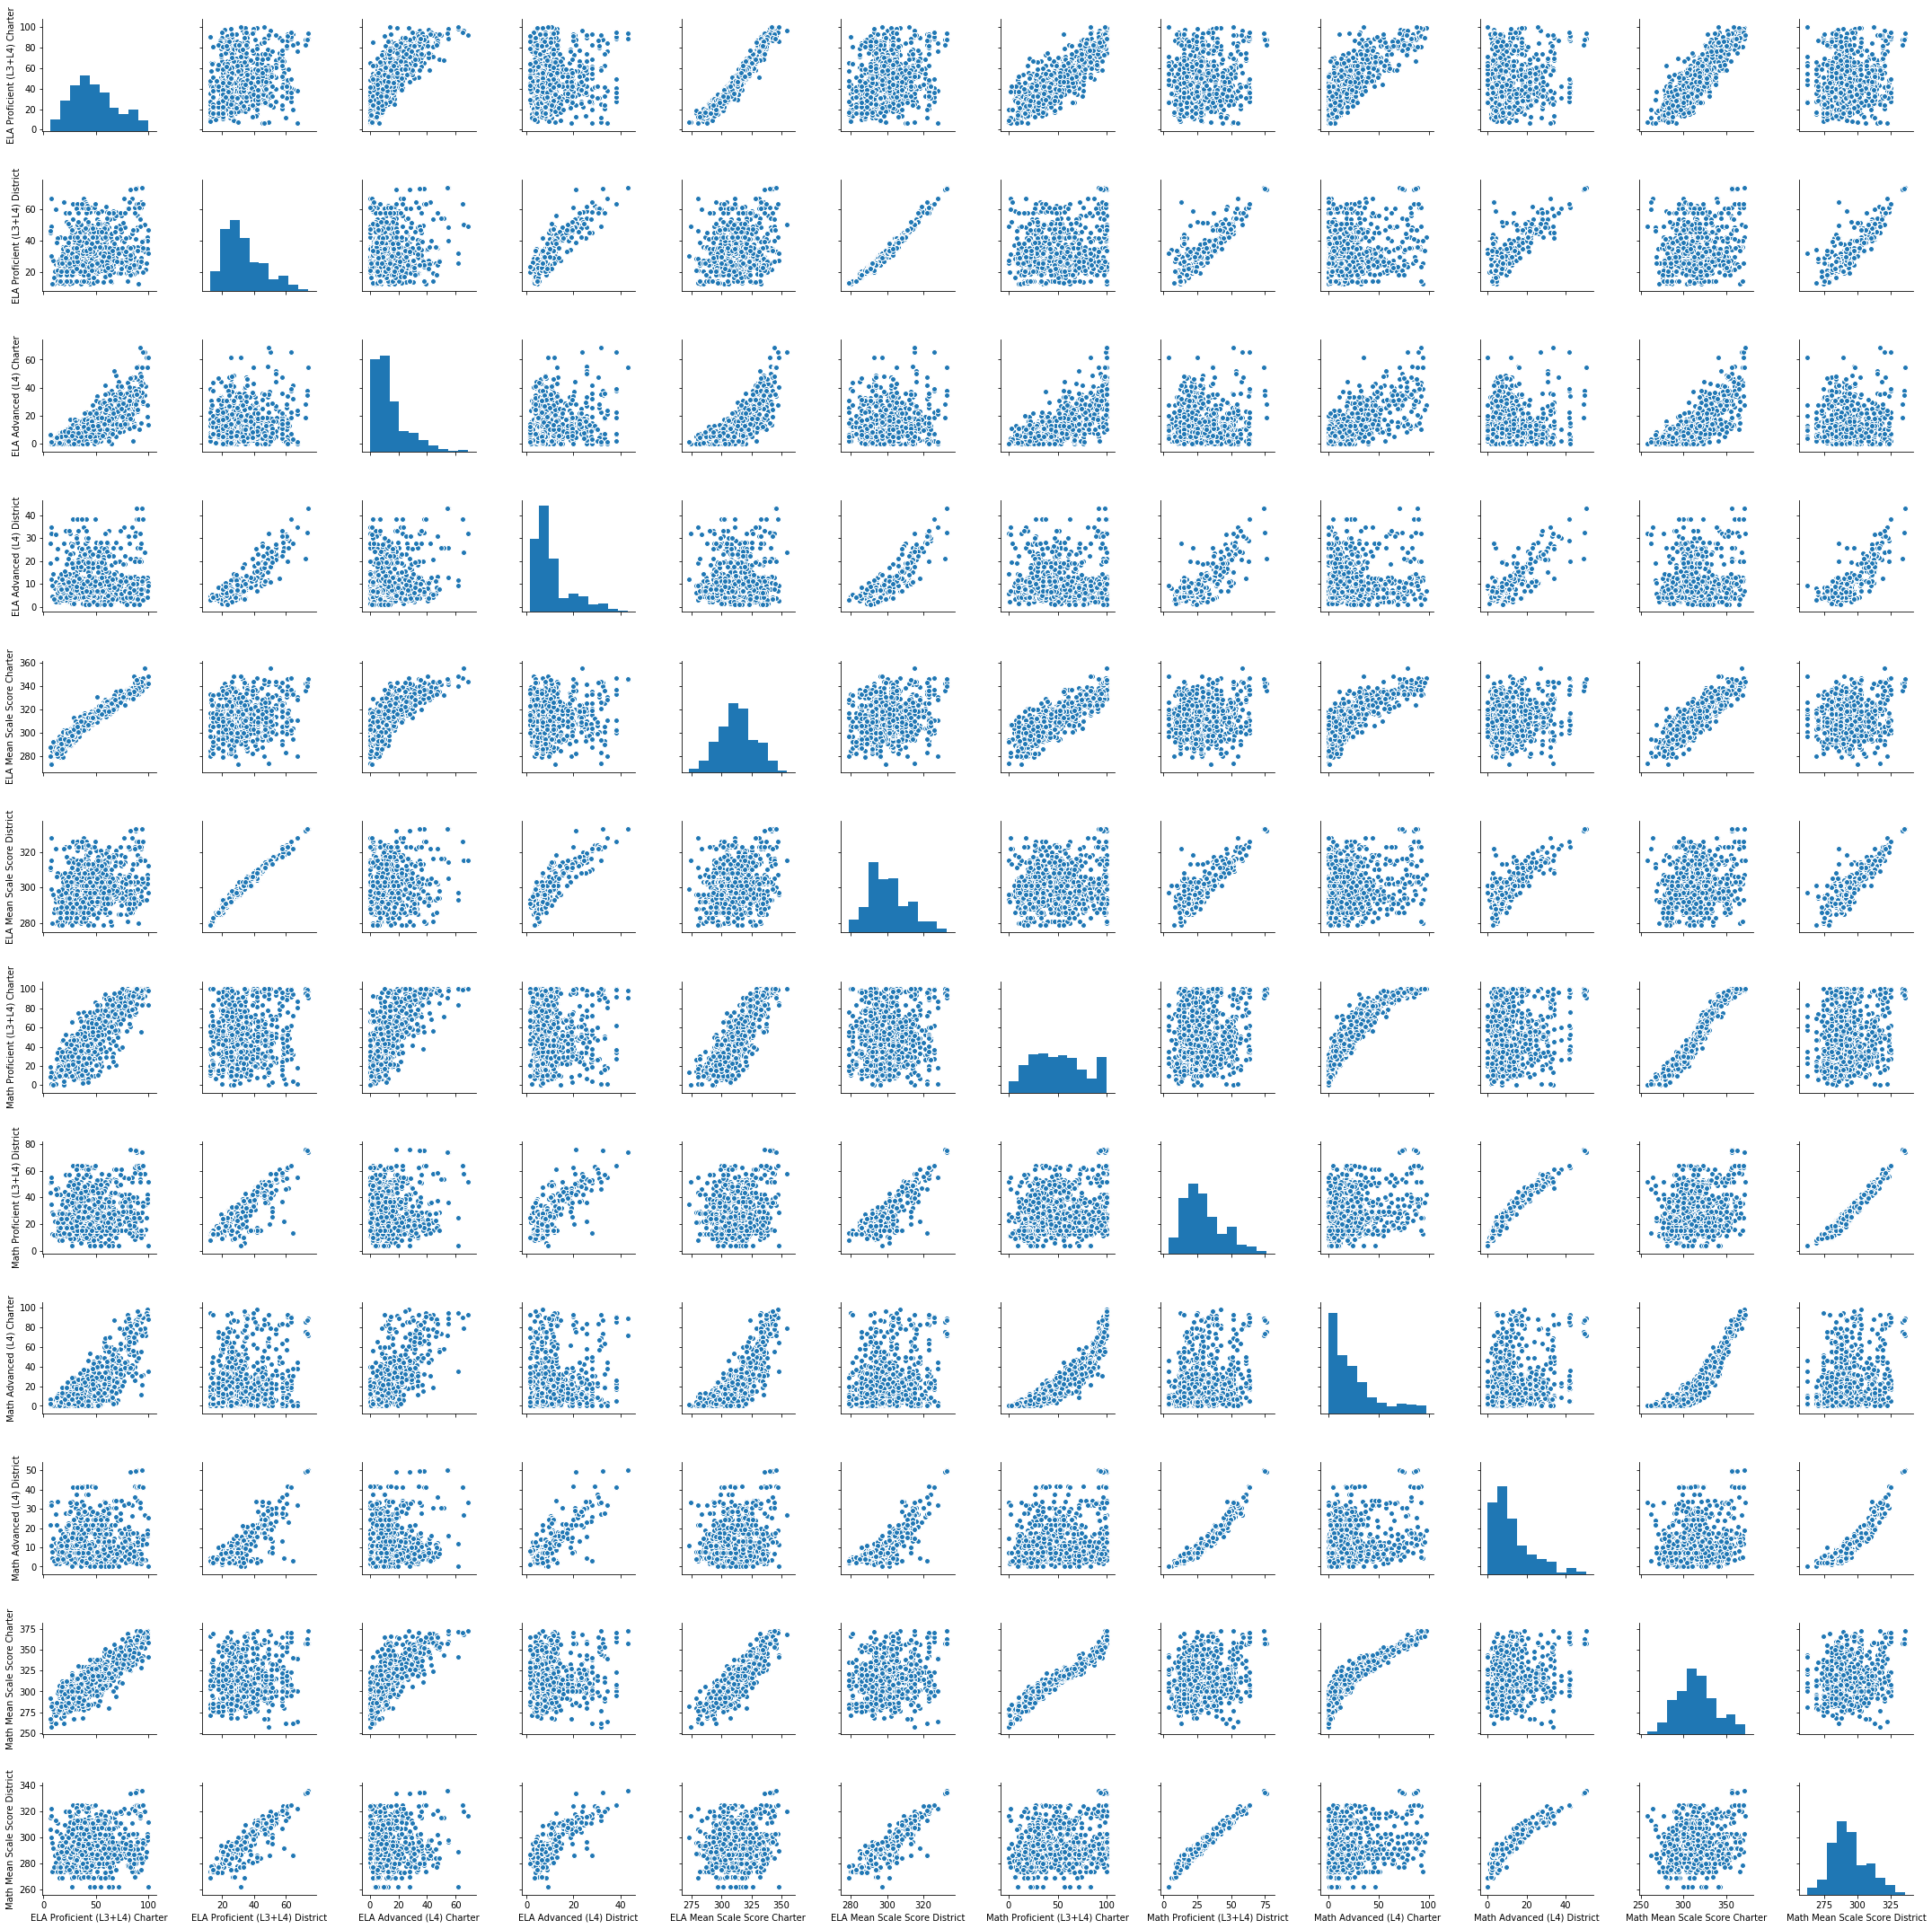

In [40]:
#For whatever reason, sending everything to pairplot seems to overload it. So I'm going to pass only the cells that 
#represent rates and scores, not differences (because that doesn't seem worth plotting and also because I said so).
#Additionally, I'm going to split off the Mean Scale Scores into a different list, as "Proficient" and "Advanced"
#just mean rates of attainment of certain scores (I think). But first I'm going to plot both lists at once, just
#to see what it looks like.
cols_to_first_plot=['ELA Proficient (L3+L4) Charter','ELA Proficient (L3+L4) District','ELA Advanced (L4) Charter',
                    'ELA Advanced (L4) District','Math Proficient (L3+L4) Charter',
                    'Math Proficient (L3+L4) District','Math Advanced (L4) Charter','Math Advanced (L4) District']
cols_to_second_plot=['ELA Mean Scale Score Charter','ELA Mean Scale Score District',
                     'Math Mean Scale Score Charter','Math Mean Scale Score District']
cols_to_combo_plot=['ELA Proficient (L3+L4) Charter','ELA Proficient (L3+L4) District','ELA Advanced (L4) Charter',
                    'ELA Advanced (L4) District','ELA Mean Scale Score Charter','ELA Mean Scale Score District',
                    'Math Proficient (L3+L4) Charter','Math Proficient (L3+L4) District','Math Advanced (L4) Charter',
                    'Math Advanced (L4) District','Math Mean Scale Score Charter','Math Mean Scale Score District']
sns.pairplot(data_svelte[cols_to_combo_plot])

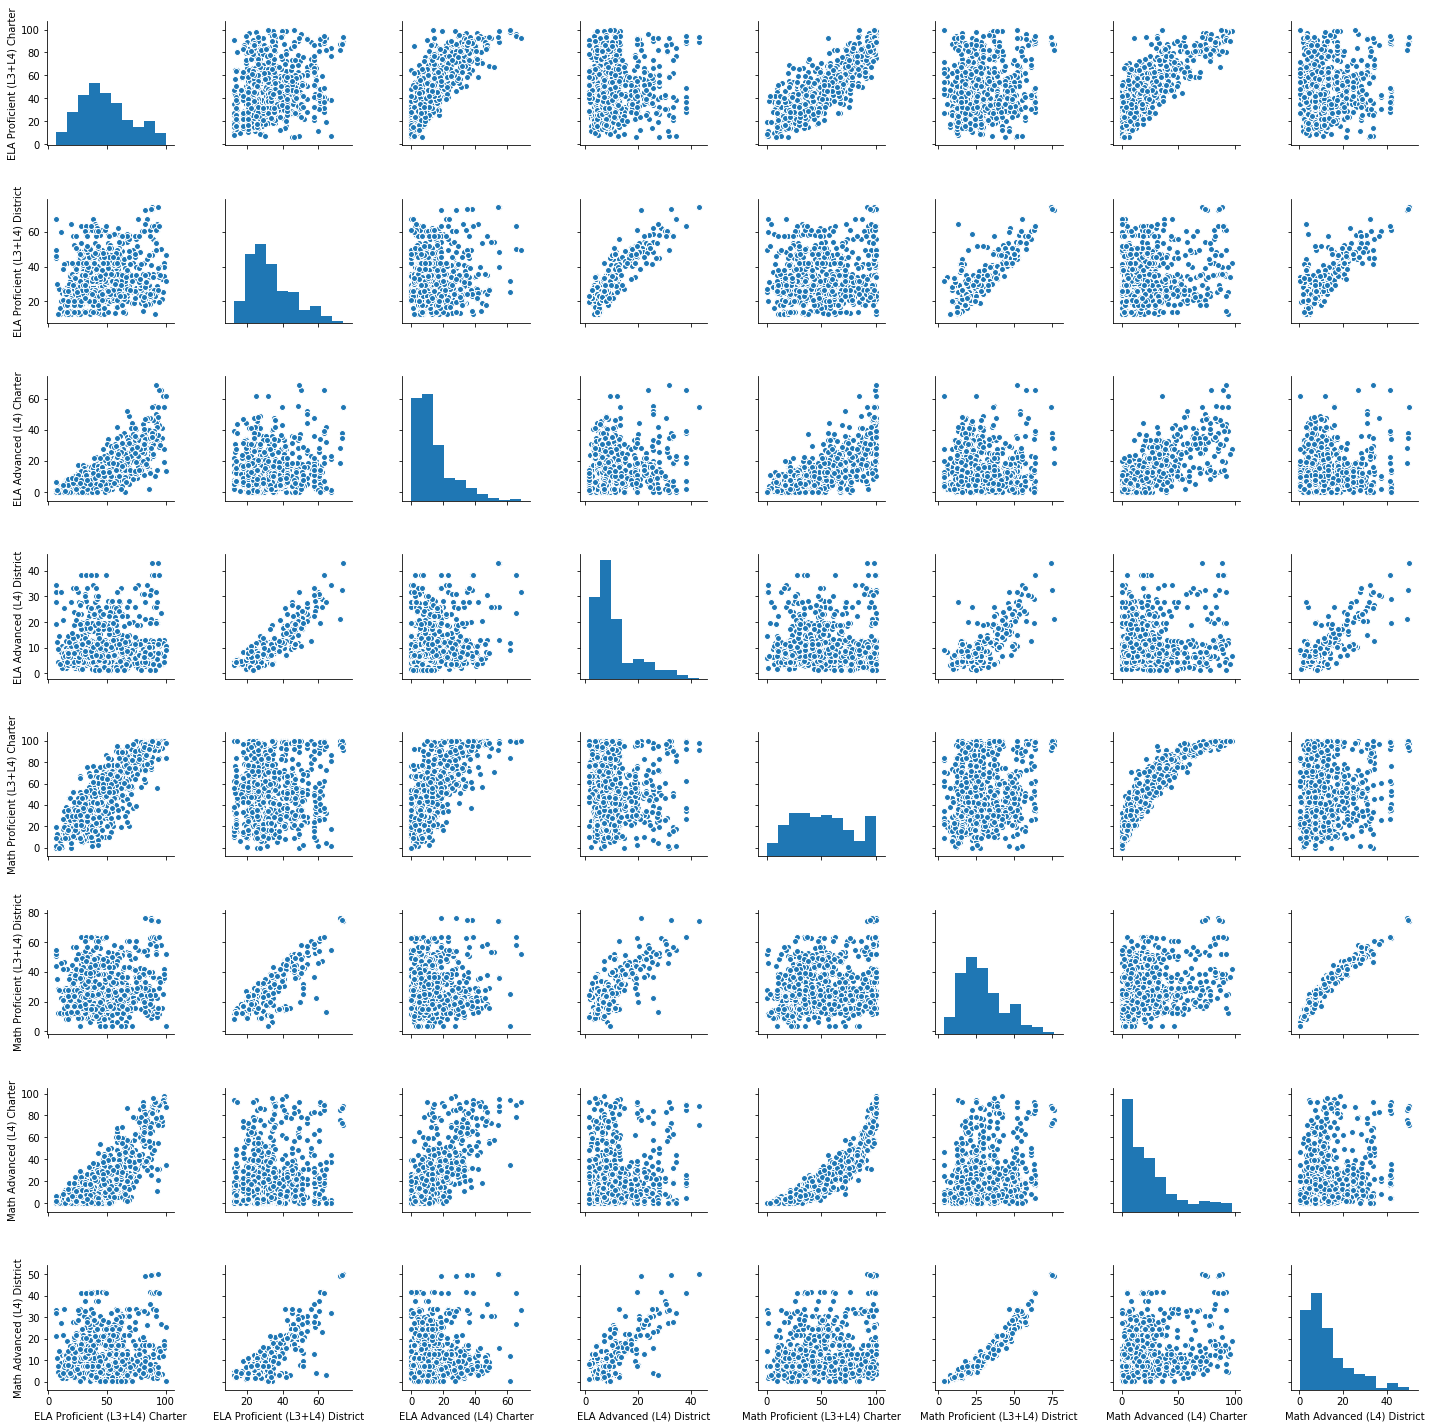

In [42]:
sns.pairplot(data_svelte[cols_to_first_plot])

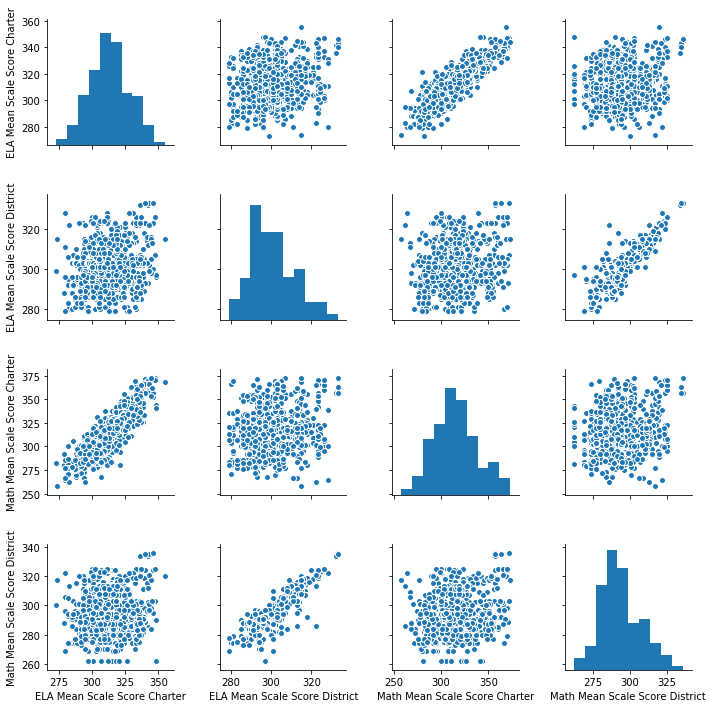

In [43]:
sns.pairplot(data_svelte[cols_to_second_plot])

Okay, so admittedly anything I say here is not really supported by anything other than Mk1Mod0 Eyeball. BUT. The apparent lack of any significant correlation between Charter and District on the same column, especially relative to the strong correlations between different columns for the same populations, is pretty striking and does definitely suggest significant differences between the two environments (obvious, I know, but still). The question now becomes what those differences are, and what other inferences I can draw from them. 